<a href="https://colab.research.google.com/github/rajgsdei/py-learning/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [85]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons) -->
  # H2 (n) -->
  # output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [87]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [112]:
# loading dataset and converting string to number
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
ds = pd.read_csv(url)
ds.tail()
pd.set_option('future.no_silent_downcasting', True)
ds['species'] = ds['species'].replace('setosa', 0)
ds['species'] = ds['species'].replace('versicolor', 1)
ds['species'] = ds['species'].replace('virginica', 2)


In [117]:
# setting up Train test split! Set X,y
X = ds.drop('species', axis = 1)
y = ds['species']

X = X.values
y = y.values

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

# converting x labels to float as dataset has them in decimal
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# converting y labes to long as we are returning integer above
y_train = torch.LongTensor(y_train.astype(int))
y_test = torch.LongTensor((y_test.astype(int)))

# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)




In [115]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.26768800616264343
Epoch: 60 and loss: 0.17942361533641815
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118493437767
Epoch: 90 and loss: 0.06520850956439972


Text(0.5, 0, 'Epoch')

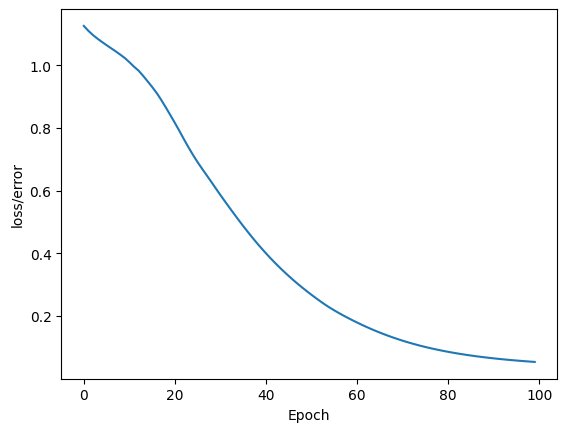

In [118]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')